# Sprint22課題 自然言語処理入門

## 【問題1】BoWとN-gram(手計算)
目的

古典的かつ強力な手法BoWとN-gramの理解
以下は俳優K.Kさんのつぶやき(コーパス)です。

文1: 今撮影中で〜す！
文2: 今休憩中で〜す(^^)
文3: 今日ドラマ撮影で〜す！
文4: 今日、映画瞬公開で〜す！！！
【問】
特殊文字除去(!や〜など)、単語分割をし以下の2パターンで文1〜文4を数値化(ベクトル化)してください。

BoW(1-gram)
BoW(2-gram)
手計算の後見やすい形にしてください。

In [0]:
import pandas as pd

def bow_gram(texts, texts_vec, vocabulary):
        df_bow_gram = pd.DataFrame(data=texts_vec, columns=vocabulary, index=texts)
        return df_bow_gram

In [0]:
vocabulary = ["I", "love", "this", "is", "the", "baseball"]
texts = ["I love baseball!!", "I love this!"]
texts_vec = [[1, 1, 0, 0, 0, 1], [1, 1, 1, 0, 0, 0]]
bow_gram(texts, texts_vec, vocabulary)

,I,love,this,is,the,baseball
I love baseball!!,1,1,0,0,0,1
I love this!,1,1,1,0,0,0


In [0]:
#前処理
import re
vocabulary = ["今", "撮影", "中", "です", "休憩", "今日", "ドラマ", "映画", "公開"]

#元の文章
texts = ["今撮影中で〜す！", "今休憩中で〜す(^^)", "今日ドラマ撮影で〜す！", "今日、映画公開で〜す！！！"]
#特殊文字の置き換え
texts = [re.sub('[〜！(^)、]', '', text) for text in texts]
print(texts)

['今撮影中です', '今休憩中です', '今日ドラマ撮影です', '今日映画公開です']


In [0]:
#1-gram

texts_vec = [
    [1, 1, 1, 1, 0, 0, 0, 0, 0],
    [1, 0, 1, 1, 1, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 1, 1, 0, 0],
    [1, 0, 0, 1, 0, 1, 0, 1, 1]
]

bow_gram(texts, texts_vec, vocabulary)

,今,撮影,中,です,休憩,今日,ドラマ,映画,公開
今撮影中です,1,1,1,1,0,0,0,0,0
今休憩中です,1,0,1,1,1,0,0,0,0
今日ドラマ撮影です,1,1,0,1,0,1,1,0,0
今日映画公開です,1,0,0,1,0,1,0,1,1


In [0]:
#2-gram
#隣り合う単語を結合した配列
vocabulary2 = list(map(lambda x: x[0]  + x[1], zip(vocabulary[:-1], vocabulary[1:])))

print(vocabulary)

texts_vec2 = [
    [1, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1]
]

bow_gram(texts, texts_vec2, vocabulary2)

['今', '撮影', '中', 'です', '休憩', '今日', 'ドラマ', '映画', '公開']


,今撮影,撮影中,中です,です休憩,休憩今日,今日ドラマ,ドラマ映画,映画公開
今撮影中です,1,1,1,0,0,0,0,0
今休憩中です,0,0,1,0,0,0,0,0
今日ドラマ撮影です,0,0,0,0,0,1,0,0
今日映画公開です,0,0,0,0,0,0,0,1


## 【問題2】TF-IDF(手計算)
標準的なTF-IDFの公式 
<br>Term Frequency:

$$
tf(t,d) = \frac{n_{t,d}}{\sum_{s \in d}n_{s,d}}
$$
* $n_{t,d}$ : 文書d内の単語tの出現回数<br>
* $\sum_{s \in d}n_{s,d}$: 文書dの全単語の出現回数の和


<br>Inverse Document Frequency:
$$
idf(t) = \log_2{\frac{N}{df(t)}}
$$
* $N$: 全文書数<br>
* $df(t)$: 単語tが出現する文書数


<br>TF-IDF:
$$
tfidf(t, d) = tf(t, d) \times idf(t)
$$

In [0]:
import numpy as np
texts_vec = [
    [1, 1, 1, 1, 0, 0, 0, 0, 0],
    [1, 0, 1, 1, 1, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 1, 1, 0, 0],
    [1, 0, 0, 1, 0, 1, 0, 1, 1]
]

vocabulary = ["今", "撮影", "中", "です", "休憩", "今日", "ドラマ", "映画", "公開"]
texts_vec = np.array(texts_vec)


n_texts = len(texts_vec)
n_words = len(vocabulary)

#term frequency
tf = np.zeros((n_texts, n_words))
for text_idx, text in enumerate(texts_vec):
        for word_idx, _ in enumerate(vocabulary):
                tf[text_idx, word_idx] = text[word_idx] / len(text)


#inverse document frequency
idf = np.zeros(( n_words))
for word_idx, _ in enumerate(vocabulary):
        idf[word_idx] = np.log2(n_texts / np.sum(texts_vec[:, word_idx]))
#tf-idf
tfidf = tf * idf

In [0]:
np.set_printoptions(precision=3, floatmode='fixed')
print("tf:\n", tf)
print("-"*50)
print("idf:\n", idf)
print("-"*50)
print("tf-idf:\n", tfidf)


tf:
 [[0.111 0.111 0.111 0.111 0.000 0.000 0.000 0.000 0.000]
 [0.111 0.000 0.111 0.111 0.111 0.000 0.000 0.000 0.000]
 [0.111 0.111 0.000 0.111 0.000 0.111 0.111 0.000 0.000]
 [0.111 0.000 0.000 0.111 0.000 0.111 0.000 0.111 0.111]]
--------------------------------------------------
idf:
 [0.000 1.000 1.000 0.000 2.000 1.000 2.000 2.000 2.000]
--------------------------------------------------
tf-idf:
 [[0.000 0.111 0.111 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.111 0.000 0.222 0.000 0.000 0.000 0.000]
 [0.000 0.111 0.000 0.000 0.000 0.111 0.222 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 0.111 0.000 0.222 0.222]]


## 【問題3】テキストクリーニング(プログラミング)
目的
実データ対応のためのテキストクリーニングの理解
正規表現の理解
【問】
テキストに以下の処理を施してください。

urlを削除
【〇〇】を削除
改行等の特殊文字を削除
絵文字除去
ここではしませんが、数字を文字列NUMBERに置き換える処理をよくします。

In [0]:
text = "<!everyone> *【スペシャル特典】有償のRubyMineやPyCharmの `6ヶ月間100%OFFクーポン` をご希望者の方先着100名様に贈呈いたします！*\n\nこの度、RubyMineやPyCharmのメーカーであるJetBrains社へのクーポンコードの提供交渉が実り、100クーポンをいただくことができました。\n\n```\nRubyMine\n<https://www.jetbrains.com/ruby/>\n\nPyCharm\n<https://www.jetbrains.com/pycharm/>\n```\n\n「ご希望の方は、手を挙げて！」方式で、ご希望の方はこの投稿の手あげスタンプをクリックしてください。\n\n期限は、 *`2019年3月20日（水）22:00まで`* とさせていただきます。\nふるってのご希望をお待ちしております！ :smile:"
ans = "有償のRubyMineやPyCharmの6ヶ月間100%OFFクーポンをご希望者の方先着100名様に贈呈いたします！この度、RubyMineやPyCharmのメーカーであるJetBrains社へのクーポンコードの提供交渉が実り、100クーポンをいただくことができました。RubyMinePyCharm「ご希望の方は、手を挙げて！」方式で、ご希望の方はこの投稿の手あげスタンプをクリックしてください。期限は、2019年3月20日（水）22:00までとさせていただきます。ふるってのご希望をお待ちしております！"

In [0]:
import re
cleaned_text = text

#<>で囲まれた部分の削除
#非欲張り量指定子()?で複数箇所に対応させる
#11<A>22<B>33を112233にする
#?なしだと1133になってしまう可能性がある
cleaned_text = re.sub(r'<.*?>', '', text)
print(cleaned_text)

 *【スペシャル特典】有償のRubyMineやPyCharmの `6ヶ月間100%OFFクーポン` をご希望者の方先着100名様に贈呈いたします！*

この度、RubyMineやPyCharmのメーカーであるJetBrains社へのクーポンコードの提供交渉が実り、100クーポンをいただくことができました。

```
RubyMine


PyCharm

```

「ご希望の方は、手を挙げて！」方式で、ご希望の方はこの投稿の手あげスタンプをクリックしてください。

期限は、 *`2019年3月20日（水）22:00まで`* とさせていただきます。
ふるってのご希望をお待ちしております！ :smile:


In [0]:

#【】で囲まれた部分の削除。同様
cleaned_text = re.sub(r'【.*?】', '', cleaned_text)
#::で囲まれた部分の削除。同様
cleaned_text = re.sub(r':.*?:', '', cleaned_text)
print(cleaned_text)

 *有償のRubyMineやPyCharmの `6ヶ月間100%OFFクーポン` をご希望者の方先着100名様に贈呈いたします！*

この度、RubyMineやPyCharmのメーカーであるJetBrains社へのクーポンコードの提供交渉が実り、100クーポンをいただくことができました。

```
RubyMine


PyCharm

```

「ご希望の方は、手を挙げて！」方式で、ご希望の方はこの投稿の手あげスタンプをクリックしてください。

期限は、 *`2019年3月20日（水）22:00まで`* とさせていただきます。
ふるってのご希望をお待ちしております！ 


In [0]:
#区切り文字、特殊文字の削除  
cleaned_text = re.sub(r'[\s`*]', '', cleaned_text)
print(cleaned_text)

有償のRubyMineやPyCharmの6ヶ月間100%OFFクーポンをご希望者の方先着100名様に贈呈いたします！この度、RubyMineやPyCharmのメーカーであるJetBrains社へのクーポンコードの提供交渉が実り、100クーポンをいただくことができました。RubyMinePyCharm「ご希望の方は、手を挙げて！」方式で、ご希望の方はこの投稿の手あげスタンプをクリックしてください。期限は、2019年3月20日（水）22:00までとさせていただきます。ふるってのご希望をお待ちしております！


In [0]:
ans == cleaned_text

True

## 【問題4】形態素解析
目的

形態素解析の理解
形態素解析のツールはMecabやJanomeなど様々ですが、
ここでは手軽に導入できるJanomeを使います。
Janome document

【問】
上記のクリーニングしたテキストをJanomeを用いて形態素解析をし、
名詞または動詞の単語を抜き出してください。
正解例

1

["有償", "RubyMine", "Pycharm", ...]

In [0]:
#janomeをインストール
!pip install janome

     |████████████████████████████████| 25.1MB 1.8MB/s 


In [0]:
from janome.tokenizer import Tokenizer

t = Tokenizer()
tokens = np.empty((0, 2))
for token in t.tokenize(cleaned_text):
        tokens = np.append(tokens, np.array([token.surface, token.part_of_speech.split(',')[0]]).reshape(1, 2), axis=0)
print(tokens[:5])

[['有償' '名詞']
 ['の' '助詞']
 ['RubyMine' '名詞']
 ['や' '助詞']
 ['PyCharm' '名詞']]


In [0]:
#名詞と動詞のみ抜き出し
tokens = np.concatenate((tokens[tokens[:, 1] == '名詞'], tokens[tokens[:, 1] == '動詞']), axis=0)[:, 0]
print(tokens)

['有償' 'RubyMine' 'PyCharm' '6' 'ヶ月' '間' '100' '%' 'OFF' 'クーポン' '希望' '者'
 '方' '先着' '100' '名' '様' '贈呈' '度' 'RubyMine' 'PyCharm' 'メーカー' 'JetBrains'
 '社' 'クーポン' 'コード' '提供' '交渉' '100' 'クーポン' 'こと' 'RubyMinePyCharm' '希望' '方'
 '手' '方式' '希望' '方' '投稿' '手' 'スタンプ' 'クリック' '期限' '2019' '年' '3' '月' '20' '日'
 '水' '22' ':' '00' '希望' 'お待ち' 'いたし' '実り' 'いただく' 'でき' '挙げ' 'あげ' 'し' 'ください'
 'さ' 'せ' 'いただき' 'し' 'おり']


## 【問題5】ニュースの分析
目的

日本語の自然言語処理の体験<br>
類似度の理解<br>
以下からldcc-20140209.tar.gzをダウンロードしてください。 <br>
[livedoor](https://www.rondhuit.com/download.html#ldcc)


[sklearn.feature_extraction.text](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

In [0]:
# livedoorのnewsをダウンロード
!wget https://www.rondhuit.com/download/ldcc-20140209.tar.gz

--2019-07-26 14:53:23--  https://www.rondhuit.com/download/ldcc-20140209.tar.gz
Resolving www.rondhuit.com (www.rondhuit.com)... 59.106.19.174
Connecting to www.rondhuit.com (www.rondhuit.com)|59.106.19.174|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8855190 (8.4M) [application/x-gzip]
Saving to: ‘ldcc-20140209.tar.gz’

ldcc-20140209.tar.g 100%[===================>]   8.44M  2.25MB/s    in 6.3s    

2019-07-26 14:53:31 (1.34 MB/s) - ‘ldcc-20140209.tar.gz’ saved [8855190/8855190]



In [0]:
# 圧縮ファイルを解凍
!tar zxf ldcc-20140209.tar.gz

In [0]:
# livedoorニュースの説明を表示
!cat text/README.txt

livedoor ニュースコーパス


概要
-----------------
本コーパスは、NHN Japan株式会社が運営する「livedoor ニュース」のうち、下記のクリエイティブ・コモンズ
ライセンスが適用されるニュース記事を収集し、可能な限りHTMLタグを取り除いて作成したものです。

- トピックニュース
  http://news.livedoor.com/category/vender/news/
- Sports Watch
  http://news.livedoor.com/category/vender/208/
- ITライフハック
  http://news.livedoor.com/category/vender/223/
- 家電チャンネル
  http://news.livedoor.com/category/vender/kadench/
- MOVIE ENTER
  http://news.livedoor.com/category/vender/movie_enter/
- 独女通信
  http://news.livedoor.com/category/vender/90/
- エスマックス
  http://news.livedoor.com/category/vender/smax/
- livedoor HOMME
  http://news.livedoor.com/category/vender/homme/
- Peachy
  http://news.livedoor.com/category/vender/ldgirls/

収集時期：2012年9月上旬


ライセンス
-----------------
各記事ファイルにはクリエイティブ・コモンズライセンス「表示 - 改変禁止」
（http://creativecommons.org/licenses/by-nd/2.1/jp/）が適用されます。
クレジット表示についてはニュースカテゴリにより異なるため、サブディレクトリにある
それぞれの LICENSE.txt をご覧ください。

livedoor はNHN Japan株式会社の登録商標です。


記事ファイルのフォーマット
-----------------
記事ファイルは以下のフォーマットにしたが

In [0]:
# サブフォルダまで読み込む
from sklearn.datasets import load_files
# encodingをutf-8指定して読み込み
bin_data = load_files('./text', encoding='utf-8')
documents = bin_data.data

In [0]:
#まずどんなニュースなのか読んでみる
documents[:2]

['http://news.livedoor.com/article/detail/4931238/\n2010-08-08T10:00:00+0900\nNY名物イベントが日本でも！名店グルメを気軽に楽しむ\nニューヨークで20年続いている食の祭典「レストラン・ウィーク」。その日本版がダイナーズクラブ特別協賛のもと7月30日よりスタート。8月31日までの期間中、青山・六本木、丸の内、銀座、横浜のエリアから、ラグジュアリーレストラン81店舗がこのイベントのために特別用意したランチメニュー2010円（税・サ別）、ディナー5000円（税・サ別）を気軽に楽しめる、とっておきのイベントです。\n\u3000\n\u3000実行委員長には、学校法人服部学園、服部栄養専門学校 理事長・校長であり医学博士でもある服部幸應氏を迎え、実行委員に石田純一さん、LA BETTOLAオーナーシェフ落合務氏、フードアナリスト協会会長、高賀右近氏、つきぢ田村三代目、田村隆氏に、そして放送作家・脚本家の小山薫堂さんなど、食のスペシャリストたちが勢揃い。\n\n参加レストランには、ミシュランのフランス版、東京版ともに星を獲得している吉野建シェフの「レストラン タテル ヨシノ 汐留」や、日本料理の名門「つきぢ田村」、「金田中 庵」、「赤坂璃宮」に「mikuni MARUNOUCHI」など、日本を代表するレストランがずらり。\n\u3000イベント期間の〜8月19日までは、特別協賛のダイナーズクラブカード会員、またはシティバンクに口座を持つシティゴールドメンバーが楽しめる先行期間となりますが、その後は誰でも参加できるので、日程のチェックは必須。\n\n\u3000予約方法は必ず事前に、各店舗に問合せを行い「ジャパンレストラン・ウィーク2010」での予約であることを伝えればOK！憧れていたレストランの料理をリーズナブルにいただけるチャンスです！極上の味とラグジュアリーな空間を満喫。そんな幸せを実感できる「ジャパンレストラン・ウィーク2010」にぜひ参加しててみてはいかがですか？\n\nJAPAN RESTAURANT WEEK 2010 -公式サイト\n',
 'http://news.livedoor.com/article/detail/6655079/\n2012-06-13T19:25:00+0

In [0]:

#テキストをクリーニングする
#クリーニング前の文の例
print(documents[0])

http://news.livedoor.com/article/detail/4931238/
2010-08-08T10:00:00+0900
NY名物イベントが日本でも！名店グルメを気軽に楽しむ
ニューヨークで20年続いている食の祭典「レストラン・ウィーク」。その日本版がダイナーズクラブ特別協賛のもと7月30日よりスタート。8月31日までの期間中、青山・六本木、丸の内、銀座、横浜のエリアから、ラグジュアリーレストラン81店舗がこのイベントのために特別用意したランチメニュー2010円（税・サ別）、ディナー5000円（税・サ別）を気軽に楽しめる、とっておきのイベントです。
　
　実行委員長には、学校法人服部学園、服部栄養専門学校 理事長・校長であり医学博士でもある服部幸應氏を迎え、実行委員に石田純一さん、LA BETTOLAオーナーシェフ落合務氏、フードアナリスト協会会長、高賀右近氏、つきぢ田村三代目、田村隆氏に、そして放送作家・脚本家の小山薫堂さんなど、食のスペシャリストたちが勢揃い。

参加レストランには、ミシュランのフランス版、東京版ともに星を獲得している吉野建シェフの「レストラン タテル ヨシノ 汐留」や、日本料理の名門「つきぢ田村」、「金田中 庵」、「赤坂璃宮」に「mikuni MARUNOUCHI」など、日本を代表するレストランがずらり。
　イベント期間の〜8月19日までは、特別協賛のダイナーズクラブカード会員、またはシティバンクに口座を持つシティゴールドメンバーが楽しめる先行期間となりますが、その後は誰でも参加できるので、日程のチェックは必須。

　予約方法は必ず事前に、各店舗に問合せを行い「ジャパンレストラン・ウィーク2010」での予約であることを伝えればOK！憧れていたレストランの料理をリーズナブルにいただけるチャンスです！極上の味とラグジュアリーな空間を満喫。そんな幸せを実感できる「ジャパンレストラン・ウィーク2010」にぜひ参加しててみてはいかがですか？

JAPAN RESTAURANT WEEK 2010 -公式サイト



In [0]:
import re
#url消す
#http(s)?はhttpと(sが0個または1個(?))の意味
#\wは[0-9a-zA-Z_]の意味[\w-]+で英数字、アンダーバー、ハイフンが1個以上連続の意味
#\.はピリオド
#([\w-]+\.)+で((英数字、アンダーバー、ハイフンの連続)とピリオドのセット)が1個以上連続(+)の意味
#(/[-\w ./?%&=]*)?で((スラッシュと（英数字、アンダーバー、ハイフン、半角スペース、ピリオド、スラッシュ、クエスチョンマーク、パーセント、アンド、イコール）の0個以上の連続(*))が0個または1個(?)の意味)

a = re.sub(r'http(s)?://([\w-]+\.)+[\w-]+(/[-\w ./?%&=]*)?', '', documents[0])
print(a)


2010-08-08T10:00:00+0900
NY名物イベントが日本でも！名店グルメを気軽に楽しむ
ニューヨークで20年続いている食の祭典「レストラン・ウィーク」。その日本版がダイナーズクラブ特別協賛のもと7月30日よりスタート。8月31日までの期間中、青山・六本木、丸の内、銀座、横浜のエリアから、ラグジュアリーレストラン81店舗がこのイベントのために特別用意したランチメニュー2010円（税・サ別）、ディナー5000円（税・サ別）を気軽に楽しめる、とっておきのイベントです。
　
　実行委員長には、学校法人服部学園、服部栄養専門学校 理事長・校長であり医学博士でもある服部幸應氏を迎え、実行委員に石田純一さん、LA BETTOLAオーナーシェフ落合務氏、フードアナリスト協会会長、高賀右近氏、つきぢ田村三代目、田村隆氏に、そして放送作家・脚本家の小山薫堂さんなど、食のスペシャリストたちが勢揃い。

参加レストランには、ミシュランのフランス版、東京版ともに星を獲得している吉野建シェフの「レストラン タテル ヨシノ 汐留」や、日本料理の名門「つきぢ田村」、「金田中 庵」、「赤坂璃宮」に「mikuni MARUNOUCHI」など、日本を代表するレストランがずらり。
　イベント期間の〜8月19日までは、特別協賛のダイナーズクラブカード会員、またはシティバンクに口座を持つシティゴールドメンバーが楽しめる先行期間となりますが、その後は誰でも参加できるので、日程のチェックは必須。

　予約方法は必ず事前に、各店舗に問合せを行い「ジャパンレストラン・ウィーク2010」での予約であることを伝えればOK！憧れていたレストランの料理をリーズナブルにいただけるチャンスです！極上の味とラグジュアリーな空間を満喫。そんな幸せを実感できる「ジャパンレストラン・ウィーク2010」にぜひ参加しててみてはいかがですか？

JAPAN RESTAURANT WEEK 2010 -公式サイト



In [0]:
#時刻消す
a = re.sub(r'(\d){4}-(\d){2}-(\d){2}T(\d){2}:(\d){2}:(\d){2}[+](\d){4}', '', a)
print(a)



NY名物イベントが日本でも！名店グルメを気軽に楽しむ
ニューヨークで20年続いている食の祭典「レストラン・ウィーク」。その日本版がダイナーズクラブ特別協賛のもと7月30日よりスタート。8月31日までの期間中、青山・六本木、丸の内、銀座、横浜のエリアから、ラグジュアリーレストラン81店舗がこのイベントのために特別用意したランチメニュー2010円（税・サ別）、ディナー5000円（税・サ別）を気軽に楽しめる、とっておきのイベントです。
　
　実行委員長には、学校法人服部学園、服部栄養専門学校 理事長・校長であり医学博士でもある服部幸應氏を迎え、実行委員に石田純一さん、LA BETTOLAオーナーシェフ落合務氏、フードアナリスト協会会長、高賀右近氏、つきぢ田村三代目、田村隆氏に、そして放送作家・脚本家の小山薫堂さんなど、食のスペシャリストたちが勢揃い。

参加レストランには、ミシュランのフランス版、東京版ともに星を獲得している吉野建シェフの「レストラン タテル ヨシノ 汐留」や、日本料理の名門「つきぢ田村」、「金田中 庵」、「赤坂璃宮」に「mikuni MARUNOUCHI」など、日本を代表するレストランがずらり。
　イベント期間の〜8月19日までは、特別協賛のダイナーズクラブカード会員、またはシティバンクに口座を持つシティゴールドメンバーが楽しめる先行期間となりますが、その後は誰でも参加できるので、日程のチェックは必須。

　予約方法は必ず事前に、各店舗に問合せを行い「ジャパンレストラン・ウィーク2010」での予約であることを伝えればOK！憧れていたレストランの料理をリーズナブルにいただけるチャンスです！極上の味とラグジュアリーな空間を満喫。そんな幸せを実感できる「ジャパンレストラン・ウィーク2010」にぜひ参加しててみてはいかがですか？

JAPAN RESTAURANT WEEK 2010 -公式サイト



In [0]:
#かっこなど消す【】,（）, 「」, 『』, 〜、~
a = re.sub(r'[【】（）「」『』〜~]', '', a)
print(a)



NY名物イベントが日本でも！名店グルメを気軽に楽しむ
ニューヨークで20年続いている食の祭典レストラン・ウィーク。その日本版がダイナーズクラブ特別協賛のもと7月30日よりスタート。8月31日までの期間中、青山・六本木、丸の内、銀座、横浜のエリアから、ラグジュアリーレストラン81店舗がこのイベントのために特別用意したランチメニュー2010円税・サ別、ディナー5000円税・サ別を気軽に楽しめる、とっておきのイベントです。
　
　実行委員長には、学校法人服部学園、服部栄養専門学校 理事長・校長であり医学博士でもある服部幸應氏を迎え、実行委員に石田純一さん、LA BETTOLAオーナーシェフ落合務氏、フードアナリスト協会会長、高賀右近氏、つきぢ田村三代目、田村隆氏に、そして放送作家・脚本家の小山薫堂さんなど、食のスペシャリストたちが勢揃い。

参加レストランには、ミシュランのフランス版、東京版ともに星を獲得している吉野建シェフのレストラン タテル ヨシノ 汐留や、日本料理の名門つきぢ田村、金田中 庵、赤坂璃宮にmikuni MARUNOUCHIなど、日本を代表するレストランがずらり。
　イベント期間の8月19日までは、特別協賛のダイナーズクラブカード会員、またはシティバンクに口座を持つシティゴールドメンバーが楽しめる先行期間となりますが、その後は誰でも参加できるので、日程のチェックは必須。

　予約方法は必ず事前に、各店舗に問合せを行いジャパンレストラン・ウィーク2010での予約であることを伝えればOK！憧れていたレストランの料理をリーズナブルにいただけるチャンスです！極上の味とラグジュアリーな空間を満喫。そんな幸せを実感できるジャパンレストラン・ウィーク2010にぜひ参加しててみてはいかがですか？

JAPAN RESTAURANT WEEK 2010 -公式サイト



In [0]:
#改行など消す
a = re.sub(r'[\n\t]', '', a)
a = re.sub(r'[\u3000]', '', a)
print(a)


NY名物イベントが日本でも！名店グルメを気軽に楽しむニューヨークで20年続いている食の祭典レストラン・ウィーク。その日本版がダイナーズクラブ特別協賛のもと7月30日よりスタート。8月31日までの期間中、青山・六本木、丸の内、銀座、横浜のエリアから、ラグジュアリーレストラン81店舗がこのイベントのために特別用意したランチメニュー2010円税・サ別、ディナー5000円税・サ別を気軽に楽しめる、とっておきのイベントです。実行委員長には、学校法人服部学園、服部栄養専門学校 理事長・校長であり医学博士でもある服部幸應氏を迎え、実行委員に石田純一さん、LA BETTOLAオーナーシェフ落合務氏、フードアナリスト協会会長、高賀右近氏、つきぢ田村三代目、田村隆氏に、そして放送作家・脚本家の小山薫堂さんなど、食のスペシャリストたちが勢揃い。参加レストランには、ミシュランのフランス版、東京版ともに星を獲得している吉野建シェフのレストラン タテル ヨシノ 汐留や、日本料理の名門つきぢ田村、金田中 庵、赤坂璃宮にmikuni MARUNOUCHIなど、日本を代表するレストランがずらり。イベント期間の8月19日までは、特別協賛のダイナーズクラブカード会員、またはシティバンクに口座を持つシティゴールドメンバーが楽しめる先行期間となりますが、その後は誰でも参加できるので、日程のチェックは必須。予約方法は必ず事前に、各店舗に問合せを行いジャパンレストラン・ウィーク2010での予約であることを伝えればOK！憧れていたレストランの料理をリーズナブルにいただけるチャンスです！極上の味とラグジュアリーな空間を満喫。そんな幸せを実感できるジャパンレストラン・ウィーク2010にぜひ参加しててみてはいかがですか？JAPAN RESTAURANT WEEK 2010 -公式サイト


In [0]:
#数字置き換え(半角と全角)

a = re.sub(r'[0-9０-９]+', 'NUMBER', a)
print(a)

NY名物イベントが日本でも！名店グルメを気軽に楽しむニューヨークでNUMBER年続いている食の祭典レストラン・ウィーク。その日本版がダイナーズクラブ特別協賛のもとNUMBER月NUMBER日よりスタート。NUMBER月NUMBER日までの期間中、青山・六本木、丸の内、銀座、横浜のエリアから、ラグジュアリーレストランNUMBER店舗がこのイベントのために特別用意したランチメニューNUMBER円税・サ別、ディナーNUMBER円税・サ別を気軽に楽しめる、とっておきのイベントです。実行委員長には、学校法人服部学園、服部栄養専門学校 理事長・校長であり医学博士でもある服部幸應氏を迎え、実行委員に石田純一さん、LA BETTOLAオーナーシェフ落合務氏、フードアナリスト協会会長、高賀右近氏、つきぢ田村三代目、田村隆氏に、そして放送作家・脚本家の小山薫堂さんなど、食のスペシャリストたちが勢揃い。参加レストランには、ミシュランのフランス版、東京版ともに星を獲得している吉野建シェフのレストラン タテル ヨシノ 汐留や、日本料理の名門つきぢ田村、金田中 庵、赤坂璃宮にmikuni MARUNOUCHIなど、日本を代表するレストランがずらり。イベント期間のNUMBER月NUMBER日までは、特別協賛のダイナーズクラブカード会員、またはシティバンクに口座を持つシティゴールドメンバーが楽しめる先行期間となりますが、その後は誰でも参加できるので、日程のチェックは必須。予約方法は必ず事前に、各店舗に問合せを行いジャパンレストラン・ウィークNUMBERでの予約であることを伝えればOK！憧れていたレストランの料理をリーズナブルにいただけるチャンスです！極上の味とラグジュアリーな空間を満喫。そんな幸せを実感できるジャパンレストラン・ウィークNUMBERにぜひ参加しててみてはいかがですか？JAPAN RESTAURANT WEEK NUMBER -公式サイト


In [0]:
#全部の文章に対して実施
import numpy as np
cleaned_documents = []
for document in documents:
    #url消す
    document = re.sub(r'http(s)?://([\w-]+\.)+[\w-]+(/[-\w ./?%&=]*)?', '', document)
    #時刻消す
    document = re.sub(r'(\d){4}-(\d){2}-(\d){2}T(\d){2}:(\d){2}:(\d){2}[+](\d){4}', '', document)
    #かっこなど消す【】,（）, 「」, 『』, 〜、~
    document = re.sub(r'[【】（）()「」「」『』［］\[\]＜＞<>〜~…“”“”・:：;；■□●◯♡＝=×!！?？&＆、。,.]', '', document)

    #改行消す
    document = re.sub(r'\n', '', document)
    document = re.sub(r'[\u3000]', '', document)
    #数字置き換え
    document = re.sub(r'[0-9０-９]+', 'NUMBER', document)
    cleaned_documents += [document]
print(np.array(cleaned_documents))   

['NY名物イベントが日本でも名店グルメを気軽に楽しむニューヨークでNUMBER年続いている食の祭典レストランウィークその日本版がダイナーズクラブ特別協賛のもとNUMBER月NUMBER日よりスタートNUMBER月NUMBER日までの期間中青山六本木丸の内銀座横浜のエリアからラグジュアリーレストランNUMBER店舗がこのイベントのために特別用意したランチメニューNUMBER円税サ別ディナーNUMBER円税サ別を気軽に楽しめるとっておきのイベントです実行委員長には学校法人服部学園服部栄養専門学校 理事長校長であり医学博士でもある服部幸應氏を迎え実行委員に石田純一さんLA BETTOLAオーナーシェフ落合務氏フードアナリスト協会会長高賀右近氏つきぢ田村三代目田村隆氏にそして放送作家脚本家の小山薫堂さんなど食のスペシャリストたちが勢揃い参加レストランにはミシュランのフランス版東京版ともに星を獲得している吉野建シェフのレストラン タテル ヨシノ 汐留や日本料理の名門つきぢ田村金田中 庵赤坂璃宮にmikuni MARUNOUCHIなど日本を代表するレストランがずらりイベント期間のNUMBER月NUMBER日までは特別協賛のダイナーズクラブカード会員またはシティバンクに口座を持つシティゴールドメンバーが楽しめる先行期間となりますがその後は誰でも参加できるので日程のチェックは必須予約方法は必ず事前に各店舗に問合せを行いジャパンレストランウィークNUMBERでの予約であることを伝えればOK憧れていたレストランの料理をリーズナブルにいただけるチャンスです極上の味とラグジュアリーな空間を満喫そんな幸せを実感できるジャパンレストランウィークNUMBERにぜひ参加しててみてはいかがですかJAPAN RESTAURANT WEEK NUMBER -公式サイト'
 '小沢一郎氏の妻が支援者に離婚を報告週刊文春報じるNUMBER日Web版週刊文春は民主党の元代表小沢一郎氏の妻が支援者宛に離婚したことを伝える手紙を送ったと報じツイッターやネット掲示板で大きな話題になっている記事によるとその手紙は小沢は放射能が怖くて秘書と一緒に逃げだしました隠し子が発覚した際小沢元代表は和子夫人に謝るどころかいつでも離婚してやると言い放ち和子夫人は一時は自殺まで考えたという小沢氏の支持者にとってはショッキングな内容

In [0]:
#単語で区切る
from janome.tokenizer import Tokenizer

t = Tokenizer()
tokens = []

for idx, document in enumerate(cleaned_documents):
    if (idx%500 == 0):
        print(idx)
    words = ""
    for token in t.tokenize(document):
        part_of_speech = token.part_of_speech.split(",")[0]
        if (part_of_speech == "名詞"):
            words += token.surface + " "
        else:
            words += token.base_form + " "
    tokens += [words]
tokens = np.array(tokens)
print(tokens)


0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
['NY 名物 イベント が 日本 で も 名店 グルメ を 気軽 に 楽しむ ニューヨーク で NUMBER 年 続く て いる 食 の 祭典 レストラン ウィーク その 日本 版 が ダイナーズクラブ 特別 協賛 の もと NUMBER 月 NUMBER 日 より スタート NUMBER 月 NUMBER 日 まで の 期間 中 青山 六本木 丸の内 銀座 横浜 の エリア から ラグジュアリーレストラン NUMBER 店舗 が この イベント の ため に 特別 用意 する た ランチ メニュー NUMBER 円 税 サ 別 ディナー NUMBER 円 税 サ 別 を 気軽 に 楽しめる とる て おく の イベント です 実行 委員 長 に は 学校 法人 服部 学園 服部 栄養 専門 学校   理事 長 校長 だ ある 医学 博士 で も ある 服部 幸 應氏 を 迎える 実行 委員 に 石田 純一 さん LA   BETTOLA オーナー シェフ 落合 務 氏 フード アナリスト 協会 会長 高賀 右近 氏 つき ぢ 田村 三 代目 田村 隆 氏 に そして 放送 作家 脚本 家 の 小山 薫 堂 さん など 食 の スペシャリスト たち が 勢揃い 参加 レストラン に は ミシュラン の フランス 版 東京 版 とも に 星 を 獲得 する て いる 吉野 建 シェフ の レストラン   タテル   ヨシノ   汐留 や 日本 料理 の 名門 つき ぢ 田村 金 田中   庵 赤坂 璃宮 に mikuni   MARUNOUCHI など 日本 を 代表 する レストラン が ずらり イベント 期間 の NUMBER 月 NUMBER 日 まで は 特別 協賛 の ダイナーズクラブカード 会員 または シティバンク に 口座 を 持つ シティゴールドメンバー が 楽しめる 先行 期間 と なる ます が その後 は 誰 でも 参加 できる ので 日程 の チェック は 必須 予約 方法 は 必ず 事前 に 各 店舗 に 問合せ を 行う ジャパンレストランウィーク NUMBER で の 予約 だ ある こと を 

In [0]:
#出現単語をカウントして分析する
#BoW + TFIDFでベクトル化する
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt


def count_words_to_show(tokens):
    #vector化して単語数の分析
    kwargs = {
        #1-gramで単語カウントできる
        'ngram_range' : (1, 1),
        'dtype' : 'int32',
        'strip_accents' : 'unicode',
        'decode_error' : 'replace',
        'analyzer' : 'word'
    }


    vectorizer = CountVectorizer(**kwargs)
    vect_texts = vectorizer.fit_transform(tokens)
    all_ngrams = vectorizer.get_feature_names()
    num_ngrams = min(50, len(all_ngrams))
    all_counts = vect_texts.sum(axis=0).tolist()[0]

    all_ngrams, all_counts = zip(*[(n, c) for c, n in sorted(zip(all_counts, all_ngrams), reverse=True)])
    ngrams = all_ngrams[:num_ngrams]
    counts = all_counts[:num_ngrams]

    idx = np.arange(num_ngrams)

    plt.figure(figsize=(10, 10))
    plt.bar(idx, counts, width=0.8)
    plt.xlabel('N-grams')
    plt.ylabel('Frequencies')
    plt.title('Frequency distribution of ngrams')
    plt.xticks(idx, ngrams, rotation=45)
    plt.show()
    
    
def get_tfidf_vector(texts):
    tfidf_vectorizer = TfidfVectorizer(use_idf=True, token_pattern='(?u)\\b\\w+\\b')
    tfidf = tfidf_vectorizer.fit_transform(texts)
    return tfidf.toarray()

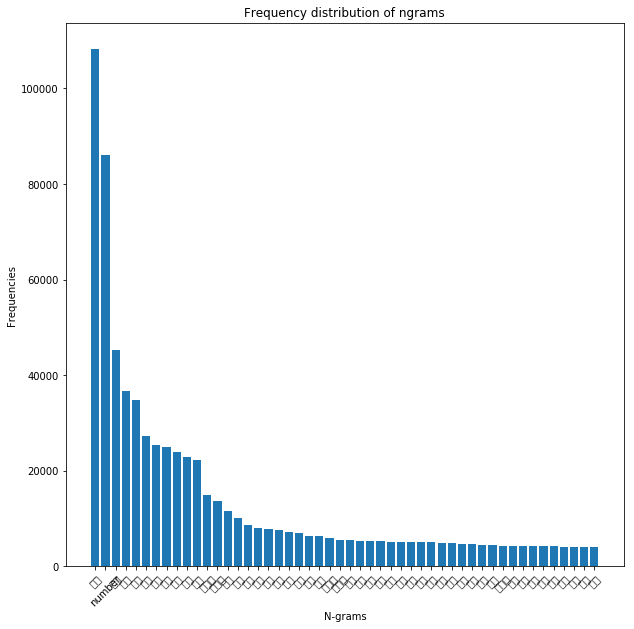

In [0]:
count_words_to_show(tokens)

In [0]:
tfidfs = get_tfidf_vector(tokens)
print(tfidfs)

[[0.000 0.000 0.000 ... 0.000 0.000 0.000]
 [0.000 0.000 0.000 ... 0.000 0.000 0.000]
 [0.000 0.000 0.000 ... 0.000 0.000 0.000]
 ...
 [0.000 0.000 0.000 ... 0.000 0.000 0.000]
 [0.000 0.000 0.000 ... 0.000 0.000 0.000]
 [0.000 0.000 0.000 ... 0.000 0.000 0.000]]


In [0]:
#あるニュースに一番cos類似度が近いニュースを出力する関数の作成
#別の類似度手法を1つ調べて上の関数に組み込む(切り替えられるようにする)
def calc_similarity(vec_1, vec_2, similarity_type='cos'):
    """
    Parameters
    --------------------
    vec_1: ndarray of shape (1, n)
    vec_2: ndarray of shape (1, n)
    similarity_type: str to choose 'cos' (cosaine similarity) or 'euc' (euclidean similarity)
    
    Return
    ------------------
    similarity: int (-1 to 1)
    
    """
    if (similarity_type=='cos'):
        similarity = _calc_cos_similarity(vec_1, vec_2)
    elif (similarity_type=='euc'):
        similarity = _euclidean_similarity(vec_1, vec_2)
        
    return similarity
  
  
def _calc_cos_similarity(vec_1, vec_2):
    """
    Parameters
    --------------------
    vec_1: ndarray of shape (1, n)
    vec_2: ndarray of shape (1, n)
    
    Return
    ------------------
    cosaine similarity: int (-1 to 1)
    
    """
    vec_1 = vec_1.reshape(1, -1)
    vec_2 = vec_2.reshape(1, -1)
    
    norm_1 = np.sqrt(vec_1 @ vec_1.T)
    norm_2 = np.sqrt(vec_2 @ vec_2.T)
    
    return ((vec_1 @ vec_2.T) / (norm_1 * norm_2))[0][0]

def _euclidean_similarity(vec_1, vec_2):
    """
    Parameters
    --------------------
    vec_1: ndarray of shape (1, n)
    vec_2: ndarray of shape (1, n)
    
    Return
    ------------------
    euclidean distance based similarity: int (0 to 1)
    
    """
    diff = (vec_1 - vec_2).reshape(1, -1)
    euclidean_distance = np.sqrt(diff @ diff.T)
    return (1/ (1 + euclidean_distance))[0][0]

In [0]:
cos_similarity = calc_similarity(tfidfs[0], tfidfs[1], similarity_type='cos')
euc_similarity = calc_similarity(tfidfs[0], tfidfs[1], similarity_type='euc')
print("cosaine: ", cos_similarity)
print("euclidean: ", euc_similarity)

cosaine:  0.07712911214981706
euclidean:  0.4239837796743603


In [0]:
#自分自身との類似度が1に成ることも確認
cos_similarity = calc_similarity(tfidfs[0], tfidfs[0], similarity_type='cos')
euc_similarity = calc_similarity(tfidfs[0], tfidfs[0], similarity_type='euc')
print("cosaine: ", cos_similarity)
print("euclidean: ", euc_similarity)

cosaine:  1.0
euclidean:  1.0


In [0]:
#このニュースと一番近いものを探す(cosaineで算出)
print(tokens[0])

NY 名物 イベント が 日本 で も 名店 グルメ を 気軽 に 楽しむ ニューヨーク で NUMBER 年 続く て いる 食 の 祭典 レストラン ウィーク その 日本 版 が ダイナーズクラブ 特別 協賛 の もと NUMBER 月 NUMBER 日 より スタート NUMBER 月 NUMBER 日 まで の 期間 中 青山 六本木 丸の内 銀座 横浜 の エリア から ラグジュアリーレストラン NUMBER 店舗 が この イベント の ため に 特別 用意 する た ランチ メニュー NUMBER 円 税 サ 別 ディナー NUMBER 円 税 サ 別 を 気軽 に 楽しめる とる て おく の イベント です 実行 委員 長 に は 学校 法人 服部 学園 服部 栄養 専門 学校   理事 長 校長 だ ある 医学 博士 で も ある 服部 幸 應氏 を 迎える 実行 委員 に 石田 純一 さん LA   BETTOLA オーナー シェフ 落合 務 氏 フード アナリスト 協会 会長 高賀 右近 氏 つき ぢ 田村 三 代目 田村 隆 氏 に そして 放送 作家 脚本 家 の 小山 薫 堂 さん など 食 の スペシャリスト たち が 勢揃い 参加 レストラン に は ミシュラン の フランス 版 東京 版 とも に 星 を 獲得 する て いる 吉野 建 シェフ の レストラン   タテル   ヨシノ   汐留 や 日本 料理 の 名門 つき ぢ 田村 金 田中   庵 赤坂 璃宮 に mikuni   MARUNOUCHI など 日本 を 代表 する レストラン が ずらり イベント 期間 の NUMBER 月 NUMBER 日 まで は 特別 協賛 の ダイナーズクラブカード 会員 または シティバンク に 口座 を 持つ シティゴールドメンバー が 楽しめる 先行 期間 と なる ます が その後 は 誰 でも 参加 できる ので 日程 の チェック は 必須 予約 方法 は 必ず 事前 に 各 店舗 に 問合せ を 行う ジャパンレストランウィーク NUMBER で の 予約 だ ある こと を 伝える ば OK 憧れる て いる た レストラン の 料理 を リーズナブル に いただける チャンス です 極上 の 味 と ラグジュアリー 

In [0]:
tfidfs[1:]

array([[0.000, 0.000, 0.000, ..., 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, ..., 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, ..., 0.000, 0.000, 0.000],
       ...,
       [0.000, 0.000, 0.000, ..., 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, ..., 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, ..., 0.000, 0.000, 0.000]])

In [0]:
similarities = []

for i in range(len(tfidfs)):
    sim = calc_similarity(tfidfs[0], tfidfs[i], similarity_type='cos')
    similarities.append(sim)

#idx=0以外（自分以外）で類似度の大きい文章を確認
#indexを降順に
similarity_order = np.argsort(similarities)[::-1]

print("text_1: ", tokens[0])
print("text_2: ", tokens[similarity_order[1]])
print("similarity: ", similarities[similarity_order[1]])

text_1:  NY 名物 イベント が 日本 で も 名店 グルメ を 気軽 に 楽しむ ニューヨーク で NUMBER 年 続く て いる 食 の 祭典 レストラン ウィーク その 日本 版 が ダイナーズクラブ 特別 協賛 の もと NUMBER 月 NUMBER 日 より スタート NUMBER 月 NUMBER 日 まで の 期間 中 青山 六本木 丸の内 銀座 横浜 の エリア から ラグジュアリーレストラン NUMBER 店舗 が この イベント の ため に 特別 用意 する た ランチ メニュー NUMBER 円 税 サ 別 ディナー NUMBER 円 税 サ 別 を 気軽 に 楽しめる とる て おく の イベント です 実行 委員 長 に は 学校 法人 服部 学園 服部 栄養 専門 学校   理事 長 校長 だ ある 医学 博士 で も ある 服部 幸 應氏 を 迎える 実行 委員 に 石田 純一 さん LA   BETTOLA オーナー シェフ 落合 務 氏 フード アナリスト 協会 会長 高賀 右近 氏 つき ぢ 田村 三 代目 田村 隆 氏 に そして 放送 作家 脚本 家 の 小山 薫 堂 さん など 食 の スペシャリスト たち が 勢揃い 参加 レストラン に は ミシュラン の フランス 版 東京 版 とも に 星 を 獲得 する て いる 吉野 建 シェフ の レストラン   タテル   ヨシノ   汐留 や 日本 料理 の 名門 つき ぢ 田村 金 田中   庵 赤坂 璃宮 に mikuni   MARUNOUCHI など 日本 を 代表 する レストラン が ずらり イベント 期間 の NUMBER 月 NUMBER 日 まで は 特別 協賛 の ダイナーズクラブカード 会員 または シティバンク に 口座 を 持つ シティゴールドメンバー が 楽しめる 先行 期間 と なる ます が その後 は 誰 でも 参加 できる ので 日程 の チェック は 必須 予約 方法 は 必ず 事前 に 各 店舗 に 問合せ を 行う ジャパンレストランウィーク NUMBER で の 予約 だ ある こと を 伝える ば OK 憧れる て いる た レストラン の 料理 を リーズナブル に いただける チャンス です 極上 の 味 と

In [143]:
#なぜそのような結果になったのか考察する
#ともに料理に関する文章であることは関係ありそう。
#他の文章も見てみる

for i in range(1,5):
  print("similarity: %.3f, text: %s" % (similarities[similarity_order[i]], tokens[similarity_order[i]]))
  

similarity: 0.227, text: 生活 レベル が 丸見え   ブログ の 料理 ネタ に は 要注意 ネット 上 だ は 料理 の 写真 が 溢れる て いる 料理 ネタ は 当たりさわり が ないし 人 から 反感 を 買う ない という ユキ さん NUMBER 歳 は ブログ で 食 を 中心 に する た 日記 を 書く て いる ブログ を はじめる た 頃 ある 事件 について 自分 の 考え を 書く た ものすごい コメント が つく て びっくり する ます た あなた は 何様 みたい だ 批判 的 だ もの が 多い それ 以来 お家 ご飯 や お 勧め の デザート など 反感 を 買う ない よう に 食 を 中心 に する て いる ます 料理 ネタ は 反感 を 買う ない の だ う か ブログ に 素敵 だ レストラン で 食べる た 豪華 だ 食事 を 載せる て いる 人 が いる ます けど こういう の って 自分 は セレブ って いう て いる よう だ ものすごい 不愉快 です という クミ さん NUMBER 歳 レストラン の 料理 は その 店 の コック さん が 作る た もの で 料金 を 払う ば 誰 でも 食べる こと が できる 今日 は これ を 食べる ます た と 書く て 高級 料理 店 の 料理 の 写真 を 掲載 する と 私 は こんな 高級 だ もの を 食べる られる お 金持ち です という メッセージ を 発する こと に なる 上品 だ は ない という 声 も ある た 何 か を 知らせる たい 発信 する たい 表現 する たい という の は 人間 として の 自然 の 欲求 だ 素敵 だ お 店 で 美味しい 食事 を する ば 当然 それ を 伝える たい なる 芸能人 の よう に 着飾る て お洒落 だ お 店 で 自分 の お 誕生 日 会 を 行う たり セレブ だ 人 たち と の お 食事 会 を しょっちゅう 開く その 時々 の 料理 の 写真 を 載せる て いる 女性 の ブログ について 周り の 独 女 たち に どう 思う か と 聞く た ところ 〇 羨ましい 自分 も そんな 生活 が する たい 〇 セレブ ぶり を

確かに料理系が多そうなので、類似度が高いのは自然に思える。

## 【問題6】感情分析
目的

NLP定番の感情分析の経験
英語の処理の実践
以下からLarge Movie Review Datasetをダウンロードしてください。
IMDBレビュー


【問】
IMDBという映画に対するレビューのデータセットを使います。
良いレビューか悪いレビューかを判定するモデルを作ってください。

[こちら](https://www.kaggle.com/iarunava/google-text-classification-notebook)を参照

In [0]:
# IMDBをカレントフォルダにダウンロード
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
# 解凍
!tar zxf aclImdb_v1.tar.gz
# aclImdb/train/unsupはラベル無しのため削除
!rm -rf aclImdb/train/unsup

--2019-07-26 15:18:57--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  21.9MB/s    in 5.7s    

2019-07-26 15:19:03 (14.1 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [0]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from tensorflow.python.keras import models
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Dropout

path = './aclImdb'

In [0]:
def shuffle(X, y):
    perm = np.random.permutation(len(X))
    X = X[perm]
    y = y[perm]
    return X, y
  
def load_imdb_dataset(path):
    imdb_path = os.path.join(path)

    # Load the dataset
    train_texts = []
    train_labels = []
    test_texts = []
    test_labels = []
    for dset in ['train', 'test']:
        for cat in ['pos', 'neg']:
            dset_path = os.path.join(imdb_path, dset, cat)
            for fname in sorted(os.listdir(dset_path)):
                if fname.endswith('.txt'):
                    with open(os.path.join(dset_path, fname)) as f:
                        if dset == 'train': train_texts.append(f.read())
                        else: test_texts.append(f.read())
                    label = 0 if cat == 'neg' else 1
                    if dset == 'train': train_labels.append(label)
                    else: test_labels.append(label)

    # Converting to np.array
    train_texts = np.array(train_texts)
    train_labels = np.array(train_labels)
    test_texts = np.array(test_texts)
    test_labels = np.array(test_labels)

    # Shuffle the dataset
    train_texts, train_labels = shuffle(train_texts, train_labels)
    test_texts, test_labels = shuffle(test_texts, test_labels)

    # Return the dataset
    return train_texts, train_labels, test_texts, test_labels

In [0]:
trX, trY, ttX, ttY = load_imdb_dataset(path)

print ('Train samples shape :', trX.shape)
print ('Train labels shape  :', trY.shape)
print ('Test samples shape  :', ttX.shape)
print ('Test labels shape   :', ttY.shape)

Train samples shape : (25000,)
Train labels shape  : (25000,)
Test samples shape  : (25000,)
Test labels shape   : (25000,)


In [0]:

#クラスラベルを抽出
#0, 1がそれぞれ12500ずつ
uniq_class_arr, counts = np.unique(trY, return_counts=True)

print ('Unique classes :', uniq_class_arr)
print ('Number of unique classes : ', len(uniq_class_arr))

for _class in uniq_class_arr:
    print ('Counts for class ', uniq_class_arr[_class], ' : ', counts[_class])

Unique classes : [0 1]
Number of unique classes :  2
Counts for class  0  :  12500
Counts for class  1  :  12500


In [0]:
#文の例とクラスを表示
size_of_samp = 10
rand_samples_to_check = np.random.randint(len(trX), size=size_of_samp)

for samp_num in rand_samples_to_check:
    print (trY[samp_num], ': ', trX[samp_num])


1 :  This movie captures the essence of growing up in smalltown America for a young girl on her own. The realism and subtle nuances, offered to Ashley Judd's character, Ruby, by the storyline, capture what can only be described as a true to life setting in the panhandle of Florida. From the slam of a screen door, to the lack of work, the echoes of what life is really like on the "red-neck riviera" provide rough choices for the young girl. Paradise did not come easy. But she slowly overcomes obstacles and deceit, and learns to be her own woman, with a strength that flows from within. Ashley Judd's winning smile, and infectious gait exude warmth and command respect and admiration. The careful pace of the character development resembles that of "Ulee's Gold" in 1997, starring Peter Fonda, and also directed by Victor Nunez.
0 :  I am glad to read so many negative comments about the Tritter plot. Everyone I talk to says the same thing. They like House's gruff nature and his intelligence, bu

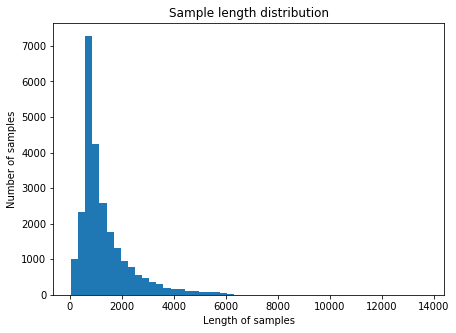

In [0]:
#文章の長さ（単語数）を表示
plt.figure(figsize=(7, 5))
plt.hist([len(sample) for sample in list(trX)], 50)
plt.xlabel('Length of samples')
plt.ylabel('Number of samples')
plt.title('Sample length distribution')
plt.show()

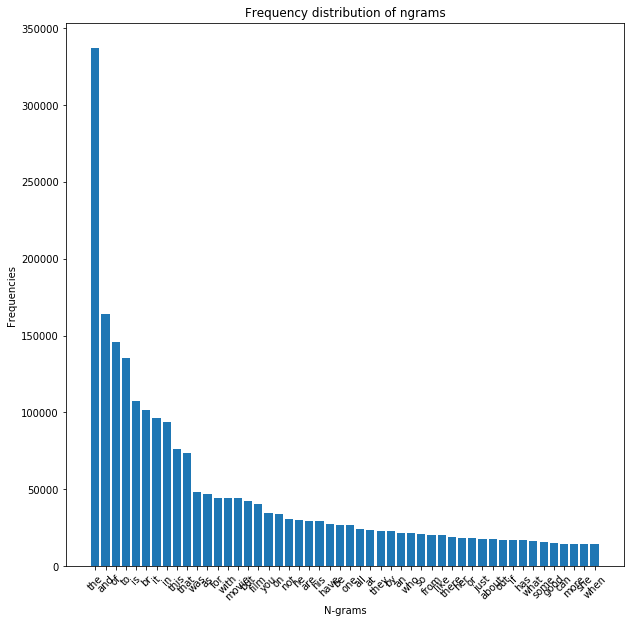

In [0]:
count_words_to_show(list(trX))

"the"や"and"などの感情分析には関係ない単語が多く出現していることがわかる。
課題２でも使ったように、これらの単語を手で取り除かなくてもTF-IDFを用いてベクトル化することで、重要な単語に重きが置かれた特徴量を作れる。

In [0]:
#2-gram
NGRAM_RANGE = (1, 2)
TOP_K = 20000
TOKEN_MODE = 'word'
MIN_DOC_FREQ = 2

def ngram_vectorize(train_texts, train_labels, val_texts):
    kwargs = {
        'ngram_range' : NGRAM_RANGE,
        'dtype' : 'int32',
        'strip_accents' : 'unicode',
        'decode_error' : 'replace',
        'analyzer' : TOKEN_MODE,
        'min_df' : MIN_DOC_FREQ,
    }
    
    # Learn Vocab from train texts and vectorize train and val sets
    tfidf_vectorizer = TfidfVectorizer(**kwargs)
    x_train = tfidf_vectorizer.fit_transform(train_texts)
    x_val = tfidf_vectorizer.transform(val_texts)
    
    # Select best k TF: Term Frequency<br>IDF: Inverse Document Frequency<br>,with feature importance measured by f_classif
    selector = SelectKBest(f_classif, k=min(TOP_K, x_train.shape[1]))
    selector.fit(x_train, train_labels)
    x_train = selector.transform(x_train).astype('float32')
    x_val = selector.transform(x_val).astype('float32')
    return x_train, x_val

In [0]:
def get_last_layer_units_and_activation(num_classes):
    if num_classes == 2:
        activation = 'sigmoid'
        units = 1
    else:
        activation = 'softmax'
        units = num_classes
    return units, activation

In [0]:
def mlp_model(layers, units, dropout_rate, input_shape, num_classes):
    op_units, op_activation = get_last_layer_units_and_activation(num_classes)
    model = models.Sequential()
    model.add(Dropout(rate=dropout_rate, input_shape=input_shape))
    
    for _ in range(layers-1):
        model.add(Dense(units=units, activation='relu'))
        model.add(Dropout(rate=dropout_rate))
    
    model.add(Dense(units=op_units, activation=op_activation))
    return model

In [0]:
def train_ngram_model(data, learning_rate=1e-3, epochs=1000, batch_size=128, layers=2, units=64, 
                      dropout_rate=0.2):
    
    num_classes = 2
    
    # Get the data
    trX, trY, ttX, ttY = data
    
    # Verify the validation labels
    '''
    unexpected_labels = [v for v in ttY if v not in range(num_classes)]
    if len(unexpected_labels):
        raise ValueError('Unexpected label values found in the validation set:'
                         ' {unexpected_labels}. Please make sure that the labels'
                         ' in the validation set are in the same range as '
                         'training labels.'.format(unexpected_labels=unexpected_labels))
    '''
    
    # Vectorize the data
    x_train, x_val = ngram_vectorize(trX, trY, ttX)
    
    # Create model instance
    model = mlp_model(layers, units=units, dropout_rate=dropout_rate,
                      input_shape=x_train.shape[1:], num_classes=num_classes)
    
    # Compile model with parameters
    if num_classes == 2:
        loss = 'binary_crossentropy'
    else:
        loss = 'sparse_categorical_crossentropy'
    optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
    model.compile(optimizer=optimizer, loss=loss, metrics=['acc'])
    
    # Create callback for early stopping on validation loss. If the loss does
    # not decrease on two consecutive tries, stop training
    callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)]
    
    # Train and validate model
    history = model.fit(x_train, trY, epochs=epochs, validation_data=(x_val, ttY),
                        verbose=2, batch_size=batch_size, callbacks=callbacks)
    
    # Print results
    history = history.history
    val_acc = history['val_acc'][-1]
    val_loss = history['val_loss'][-1]
    print ('Validation accuracy: {acc}, loss: {loss}'.format(
            acc=val_acc, loss=val_loss))
    
    # Save model
    model.save('IMDB_mlp_model_' + str(val_acc) + '_' + str(loss) + '.h5')
    return val_acc, val_loss

In [0]:

#train
results = train_ngram_model((trX, trY, ttX, ttY))

print ('With lr=1e-3 | val_acc={results[0]} | val_loss={results[1]}'.format(results=results))
print ('===========================================================================================')

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1616: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)
W0726 05:43:08.097345 140666534406016 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0726 05:43:08.195410 140666534406016 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broa

Train on 25000 samples, validate on 25000 samples
Epoch 1/1000
25000/25000 - 11s - loss: 0.4744 - acc: 0.8626 - val_loss: 0.3257 - val_acc: 0.8866
Epoch 2/1000
25000/25000 - 11s - loss: 0.2348 - acc: 0.9206 - val_loss: 0.2523 - val_acc: 0.9021
Epoch 3/1000
25000/25000 - 11s - loss: 0.1713 - acc: 0.9393 - val_loss: 0.2334 - val_acc: 0.9061
Epoch 4/1000
25000/25000 - 11s - loss: 0.1358 - acc: 0.9529 - val_loss: 0.2297 - val_acc: 0.9057
Epoch 5/1000
25000/25000 - 11s - loss: 0.1124 - acc: 0.9630 - val_loss: 0.2351 - val_acc: 0.9032
Epoch 6/1000
25000/25000 - 11s - loss: 0.0956 - acc: 0.9688 - val_loss: 0.2392 - val_acc: 0.9015
Validation accuracy: 0.9014800190925598, loss: 0.23916617460250855
With lr=1e-3 | val_acc=0.9014800190925598 | val_loss=0.23916617460250855


In [0]:
results

(0.90148, 0.23916617460250855)